In [1]:
import pandas as pd
import scipy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Abrindo arquivos
# csv20181 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2018_1.csv", sep = ";")
# csv20182 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2018_2.csv", sep = ";")
# csv20191 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2019_1.csv", sep = ";")
# csv20192 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2019_2.csv", sep = ";")
csv20201 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_1.csv", sep = ";")
csv20202 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_2.csv", sep = ";")
csv20211 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_1.csv", sep = ";")
csv20212 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_2.csv", sep = ";")


/tmp/ipykernel_2413/3837326122.py:6: DtypeWarning: Columns (66,79) have mixed types. Specify dtype option on import or set low_memory=False.
  csv20201 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_1.csv", sep = ";")
/tmp/ipykernel_2413/3837326122.py:7: DtypeWarning: Columns (66,79) have mixed types. Specify dtype option on import or set low_memory=False.
  csv20202 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_2.csv", sep = ";")
/tmp/ipykernel_2413/3837326122.py:8: DtypeWarning: Columns (66,86) have mixed types. Specify dtype option on import or set low_memory=False.
  csv20211 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_1.csv", sep = ";")
/tmp/ipykernel_2413/3837326122.py:9: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  csv20212 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_2.csv", sep = ";")


In [ ]:
# Concatenando documentos de 2020 a 2021 em um so
df_2020to2021 = pd.concat([csv20201, csv20202, csv20211, csv20212], ignore_index=True)
display(df_2020to2021)

In [5]:
# Filtrando linhas por tipo de cancer
csv_cancerpulmao = df_2020to2021.loc[df_2020to2021['LINHAA'] ==  "*C341"] # C34.1 refere-se ao câncer de pulmão no CID 10
csv_cancercolon = df_2020to2021.loc[df_2020to2021['LINHAA'] ==  "*C180"]  # C18 refere-se ao câncer de cólon no CID 10
csv_cancerpele = df_2020to2021.loc[df_2020to2021['LINHAA'] ==  "*C430"]   # C43 refere-se ao câncer de pele no CID 10

# Puxando coluna de idades
idades_cancerpulmao = csv_cancerpulmao['IDADE']
idades_cancercolon = csv_cancercolon['IDADE']
idades_cancerpele = csv_cancerpele['IDADE']

# Puxando coluna de municipios
municipios_cancerpulmao = csv_cancerpulmao['CODMUNRES']
municipios_cancercolon = csv_cancercolon['CODMUNRES']
municipios_cancerpele = csv_cancerpele['CODMUNRES']

# Testando se as idades filtradas estão em anos
for i in idades_cancerpulmao:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break

for i in idades_cancercolon:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break

for i in idades_cancerpele:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break



In [6]:
dic_Mun = {12 : "ACRE" , 27 : "ALAGOAS", 16 : "AMAPÁ", 13 : "AMAZONAS", 29 : "BAHIA",
            	23 : "CEARÁ", 53 : "DF", 32 : "ESPÍRITO SANTO", 52 : "GOIÁS",
            	21 : "MARANHÃO", 51 : "MATO GROSSO", 50 : "MATO GROSSO DO SUL", 
            	31 : "MINAS GERAIS" , 15 : "PARÁ" , 25 : "PARAÍBA" , 41 : "PARANÁ" , 26 : "PERNAMBUCO",
            	22 : "PIAUÍ" , 33 : "RIO DE JANEIRO" , 24 : "RIO GRANDE DO NORTE" , 43 : "RIO GRANDE DO SUL" , 
            	11 : "RONDONIA" , 14 : "RORAIMA" , 42 : "SANTA CATARINA" , 35 : "SÃO PAULO" ,
            	28 : "SEGIPE" , 17 : "TOCANTINS"}

In [7]:
municipios_cancerpulmao_ = [int(mun/10000) for mun in municipios_cancerpulmao]
municipios_cancercolon_ = [int(mun/10000) for mun in municipios_cancercolon]
municipios_cancerpele_ = [int(mun/10000) for mun in municipios_cancerpele]
print(municipios_cancercolon_)
moda = scipy.stats.mode(municipios_cancerpele_)
print(moda)
print(dic_Mun[moda[0]])


[13, 29, 29, 29, 29, 29, 29, 29, 23, 23, 23, 53, 32, 32, 32, 32, 32, 32, 21, 31, 31, 50, 50, 15, 26, 26, 41, 41, 41, 41, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 24, 11, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 28, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 13, 29, 29, 29, 23, 23, 23, 53, 53, 32, 52, 52, 31, 31, 31, 31, 31, 31, 31, 50, 50, 15, 15, 25, 26, 26, 41, 41, 41, 41, 33, 33, 33, 33, 33, 33, 33, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]


ModeResult(mode=15, count=2)
PARÁ


In [8]:
idades_cancerpulmao = [idade - 400 for idade in idades_cancerpulmao]
idades_cancercolon = [idade - 400 for idade in idades_cancercolon]
idades_cancerpele = [idade - 400 for idade in idades_cancerpele]

print(f'Idades 1: {idades_cancerpulmao}')
print(f'Idades 2: {idades_cancercolon}')
print(f'Idades 2: {idades_cancerpele}')

Idades 1: [67, 77, 62, 78, 82, 88, 66, 80, 75, 72, 66, 81, 58, 85, 57, 80, 67, 82, 71, 64, 79, 91, 61, 61, 70, 72, 90, 80, 62, 61, 48, 83, 62, 65, 78, 70, 68, 56, 74, 69, 51, 78, 91, 74, 70, 68, 76, 60, 64, 76, 73, 55, 67, 68, 82, 56, 74, 64, 84, 79, 68, 71, 68, 60, 62, 72, 74, 77, 89, 59, 69, 68, 80, 65, 43, 84, 84, 56, 71, 66, 67, 54, 57, 78, 57, 73, 54, 64, 71, 64, 64, 84, 86, 58, 65, 85, 76, 66, 71, 55, 56, 63, 83, 74, 65, 60, 76, 60, 75, 66, 75, 65, 78, 52, 78, 74, 42, 81, 82, 72, 79, 88, 68, 67, 70, 59, 66, 79, 58, 62, 75, 72, 73, 73, 89, 65, 83, 95, 78, 73, 74, 66, 76, 69, 60, 65, 69, 72, 60, 93, 71, 60, 68, 62, 81, 66, 82, 62, 68, 43, 60, 58, 74, 44, 81, 70, 93, 78, 74, 59, 58, 78, 63, 66, 91, 77, 92, 76, 57, 46, 48, 61, 74, 70, 82, 72, 59]
Idades 2: [59, 86, 73, 69, 70, 64, 72, 77, 70, 95, 84, 38, 61, 84, 54, 77, 62, 71, 75, 67, 58, 80, 92, 78, 60, 82, 73, 61, 64, 70, 43, 82, 66, 93, 58, 68, 78, 82, 77, 78, 84, 36, 74, 72, 65, 89, 87, 86, 69, 81, 94, 64, 71, 73, 82, 45, 70, 72

In [9]:
# Valor do alpha
alpha = 0.05

# Teste Shapiro Wilk para o Cancer de Pulmao
stat_pulmao, p_pulmao= scipy.stats.shapiro(idades_cancerpulmao)
print(f'Estatística do teste cancer de pulmao: {stat_pulmao}')
print(f'Valor-p cancer de pulmao: {p_pulmao}')

if p_pulmao > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Colon
stat_colon, p_colon= scipy.stats.shapiro(idades_cancercolon)
print(f'Estatística do teste cancer de colon: {stat_colon}')
print(f'Valor-p cancer de colon: {p_colon}')

if p_colon > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Pele
stat_pele, p_pele= scipy.stats.shapiro(idades_cancerpele)
print(f'Estatística do teste cancer de pele: {stat_pele}')
print(f'Valor-p cancer de pele: {p_pele}')

if p_pele > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

Estatística do teste cancer de pulmao: 0.9924585966355008
Valor-p cancer de pulmao: 0.44579788155647404
Distribuição aparentemente normal (falha ao rejeitar H0)

Estatística do teste cancer de colon: 0.9834642889291058
Valor-p cancer de colon: 0.04210388765819734
Distribuição não é normal (rejeita-se H0)

Estatística do teste cancer de pele: 0.9662007652912256
Valor-p cancer de pele: 0.8660103980407188
Distribuição aparentemente normal (falha ao rejeitar H0)



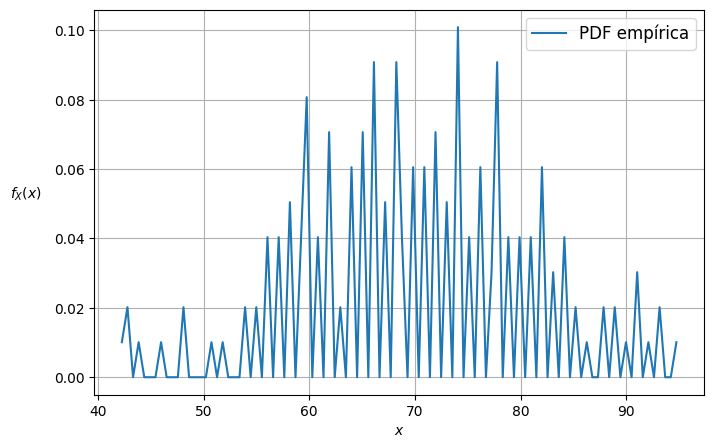

In [10]:
# Exemplo de vetores para comparação estatística
h1, c1 = np.histogram(idades_cancerpulmao, bins = 100)
epdf1 = (h1 / len(idades_cancerpulmao)) / (c1[1] - c1[0])
fig = plt.figure()
ax = fig.add_subplot(111)
xrange = np.max(c1) - np.min(c1)
yrange = np.max(epdf1) - np.min(epdf1)
ax.set_aspect(5.0 * xrange / yrange / 8.0)
plt.tight_layout()
plt.plot((c1[1 :] + c1[: len(c1) - 1]) / 2.0, epdf1, label = 'PDF empírica', linewidth = 1.5)
x = np.linspace(-2, 5, 10000)
plt.xlabel('${x}$')
plt.ylabel('${f_X(x)}$', rotation = 0.0, labelpad = 20)
plt.grid()
plt.legend(fontsize=12.0)
plt.show()

In [11]:
# Supondo que 'idades1' seja uma lista ou array de dados
idades1 = np.array(municipios_cancercolon_)

# Parâmetros estatísticos
media = np.mean(idades1)  # Média
mediana = np.median(idades1)  # Mediana
desvio_padrao = np.std(idades1)  # Desvio padrão (populacional)
variancia = np.var(idades1)  # Variância (populacional)
minimo = np.min(idades1)  # Valor mínimo
maximo = np.max(idades1)  # Valor máximo
percentis = np.percentile(idades1, [25, 50, 75])  # Quartis (percentis 25%, 50%, 75%)
amplitude = np.ptp(idades1)  # Amplitude (diferença entre max e min)

# Exibir os resultados
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"Percentis (25%, 50%, 75%): {percentis}")
print(f"Amplitude: {amplitude}")


Média: 35.36094674556213
Mediana: 35.0
Desvio Padrão: 7.717260393391718
Variância: 59.556107979412495
Valor mínimo: 11
Valor máximo: 53
Percentis (25%, 50%, 75%): [32. 35. 42.]
Amplitude: 42
